# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [52]:
# Load pickled data
import pickle


# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [53]:
import numpy as np

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [54]:
#testing to find general ways to specify dims for cnn
print(list(X_train[1].shape))
print(len(np.unique(y_test)))
print(list(X_train.shape))
print(y_train.shape)

[32, 32, 3]
43
[39209, 32, 32, 3]
(39209,)


In [55]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = list(X_train[1].shape)

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_test))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = [32, 32, 3]
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [37]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
np.unique(y_train,return_counts=True,return_index=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42], dtype=uint8),
 array([    0,   210,  2430,  4680,  6090,  8070,  9930, 10350, 11790,
        13200, 14670, 16680, 18000, 20100, 22260, 23040, 23670, 24090,
        25200, 26400, 26610, 26970, 27300, 27690, 28200, 28470, 29970,
        30570, 30810, 31350, 31620, 32070, 32850, 33090, 33779, 34199,
        35399, 35789, 35999, 38069, 38369, 38729, 38969]),
 array([ 210, 2220, 2250, 1410, 1980, 1860,  420, 1440, 1410, 1470, 2010,
        1320, 2100, 2160,  780,  630,  420, 1110, 1200,  210,  360,  330,
         390,  510,  270, 1500,  600,  240,  540,  270,  450,  780,  240,
         689,  420, 1200,  390,  210, 2070,  300,  360,  240,  240]))

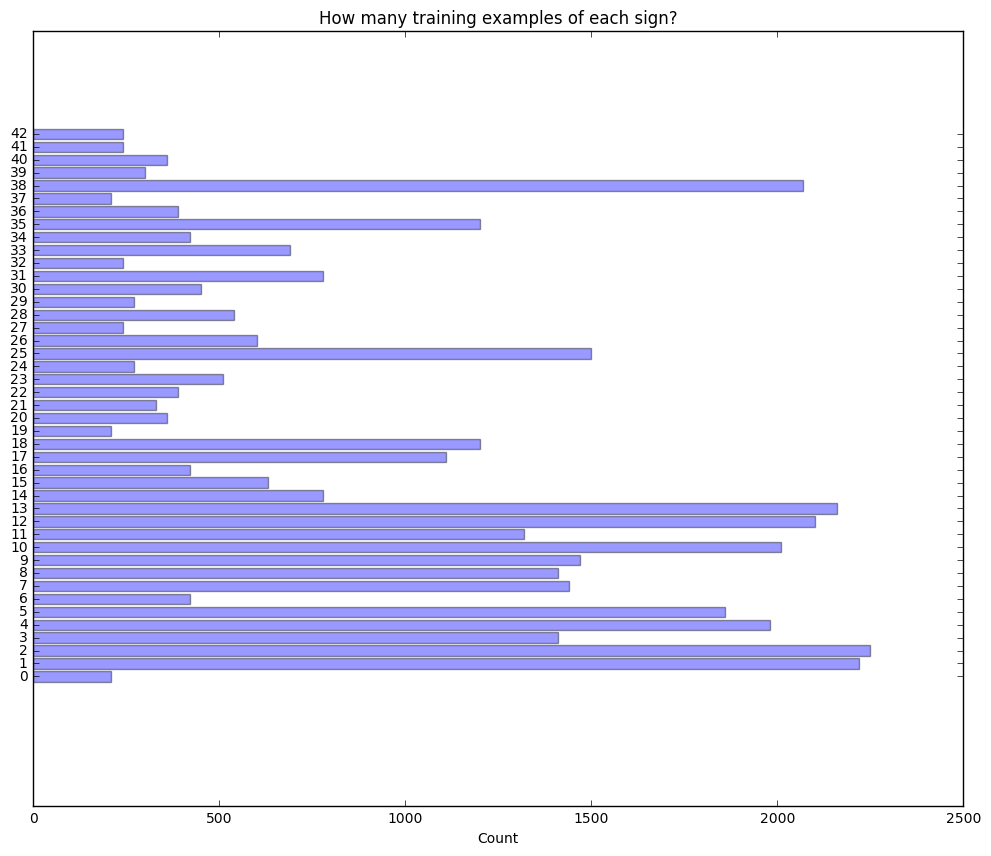

In [38]:
#used bar example from mathplotlib link provided above
unique_signs=np.unique(y_train,return_counts=True,return_index=True)
sign_type = unique_signs[0]
y_pos = np.arange(len(unique_signs[0]))
count = unique_signs[2]

plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
plt.barh(y_pos, count,  align='center', alpha=0.4)
plt.yticks(y_pos, sign_type)
plt.xlabel('Count')
plt.title('How many training examples of each sign?')



plt.show()

In [ ]:
#code came from LeNet lab and modified to run through each first unique sign

for index in unique_signs[1]:
    image = X_train[index].squeeze()

    plt.figure(figsize=(1,1))
    plt.imshow(image)
    #print(y_train[index])

In [ ]:
#used bar example from mathplotlib link provided above
unique_signs=np.unique(y_test,return_counts=True,return_index=True)
sign_type = unique_signs[0]
y_pos = np.arange(len(unique_signs[0]))
count = unique_signs[2]

plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
plt.barh(y_pos, count,  align='center', alpha=0.4)
plt.yticks(y_pos, sign_type)
plt.xlabel('Count')
plt.title('How many test examples of each sign?')



plt.show()

#Data Augmentation for Generating Data


In [56]:
import cv2
def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    # return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
def grayscale_dataset(dataset):
    i=0
    for image in dataset:
        img=grayscale(image)
        if i == 0:
            user_data = np.array(img)[np.newaxis,...]
        else:    
            user_data=np.concatenate((user_data,np.array(img)[np.newaxis,...]))
        i+=1
    return user_data
def scaling(img,scale_x,scale_y):
    return cv2.resize(img,None,fx=scale_x, fy=scale_y, interpolation = cv2.INTER_LINEAR)

def translation(img, shift_x,shift_y):
    rows,cols = img.shape[0:2]
    M = np.float32([[1,0,shift_x],[0,1,shift_y]])
    return cv2.warpAffine(img,M,(cols,rows))

def rotation(img, rotation_angle):
    rows,cols = img.shape[0:2]

    M = cv2.getRotationMatrix2D((cols/2,rows/2),rotation_angle,1)
    return cv2.warpAffine(img,M,(cols,rows))

In [57]:
def warp_images(img):
    position = np.random.randint(low=0,high=10,size=1)
    if position%2 ==1:
        rotation_angle = np.random.randint(low=-20,high=21,size=1)
        img= rotation(img, rotation_angle)
    if position%2 ==0:
        shift = np.random.randint(low=-6,high=7, size=2)
        img=translation(img, shift[0],shift[1])
    return img

def augment_data (data_set_features,data_set_labels,unique_labels,max_sign_count):
    #data_set_features=grayscale_dataset(data_set_features)
    data_set_features_augmented = np.copy(data_set_features)
    data_set_labels_augmented = np.copy(data_set_labels)
    for label, position, count in unique_labels:
        lower_range = position
        upper_range = position + count
        max_signs=int(max_sign_count/count*np.random.randint(low=5,high=11,size=1)[0])
        i=0
        while i < max_signs:
            i +=1
            rand_sample=np.random.randint(low=lower_range,high=upper_range,size=1)
            img=warp_images(data_set_features[rand_sample[0]])
            plt.figure(figsize=(1,1))
            plt.title(label)
            plt.imshow(img, cmap="gray")
            plt.show()
            data_set_features_augmented=np.concatenate((data_set_features_augmented,np.array(img)[np.newaxis,...]))
            data_set_labels_augmented=np.append(data_set_labels_augmented,np.array(label)[np.newaxis,...],axis=0)
    return data_set_features_augmented, data_set_labels_augmented

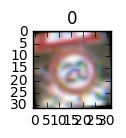

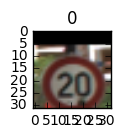

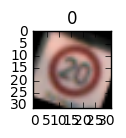

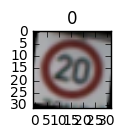

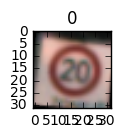

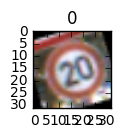

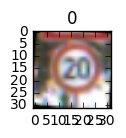

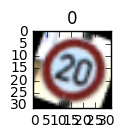

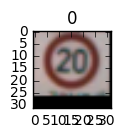

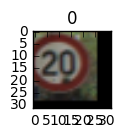

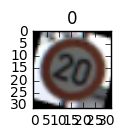

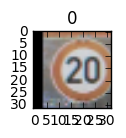

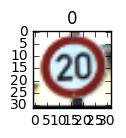

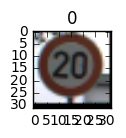

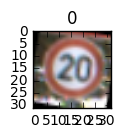

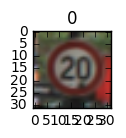

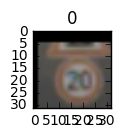

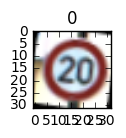

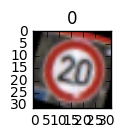

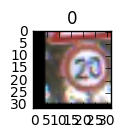

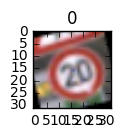

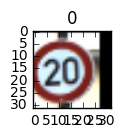

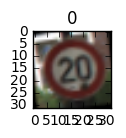

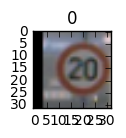

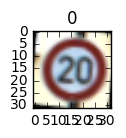

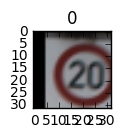

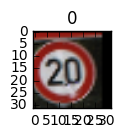

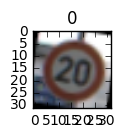

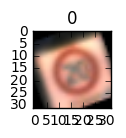

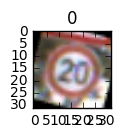

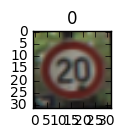

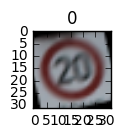

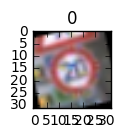

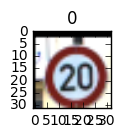

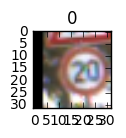

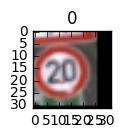

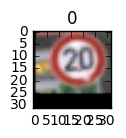

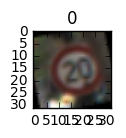

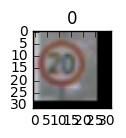

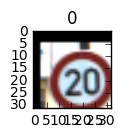

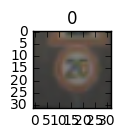

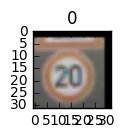

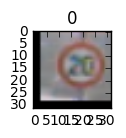

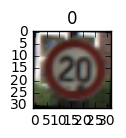

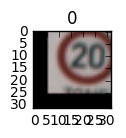

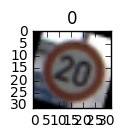

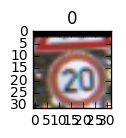

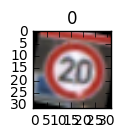

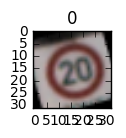

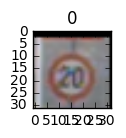

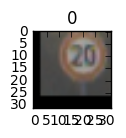

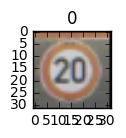

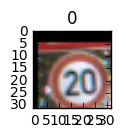

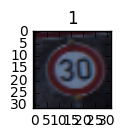

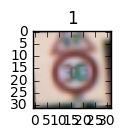

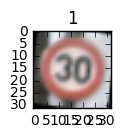

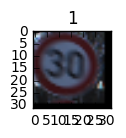

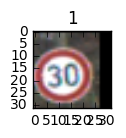

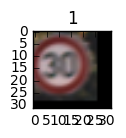

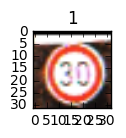

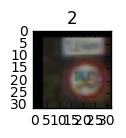

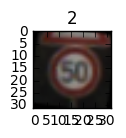

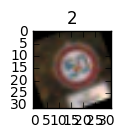

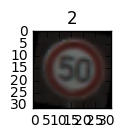

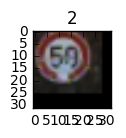

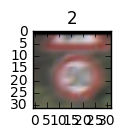

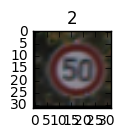

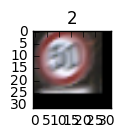

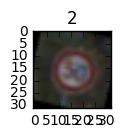

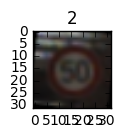

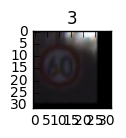

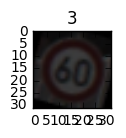

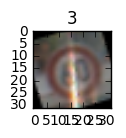

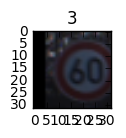

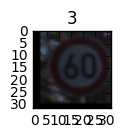

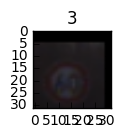

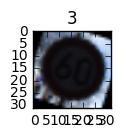

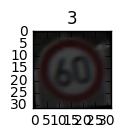

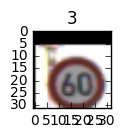

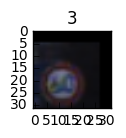

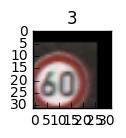

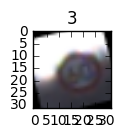

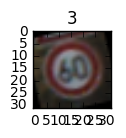

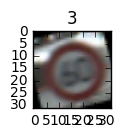

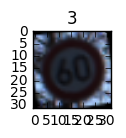

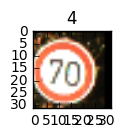

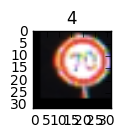

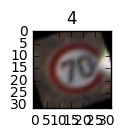

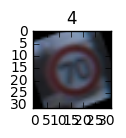

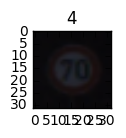

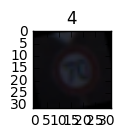

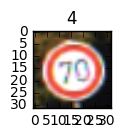

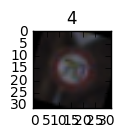

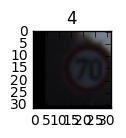

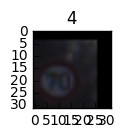

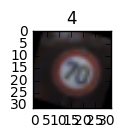

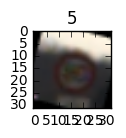

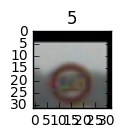

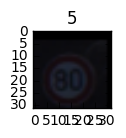

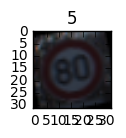

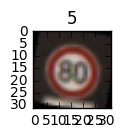

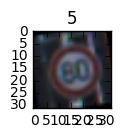

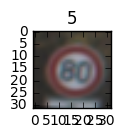

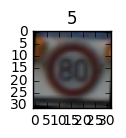

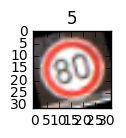

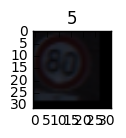

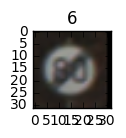

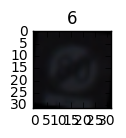

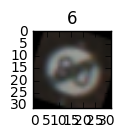

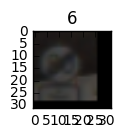

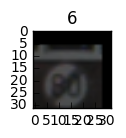

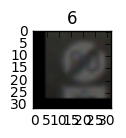

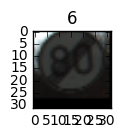

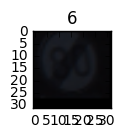

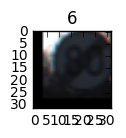

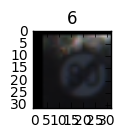

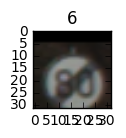

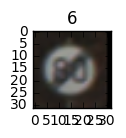

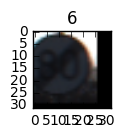

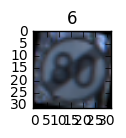

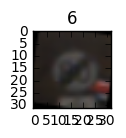

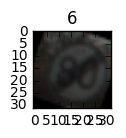

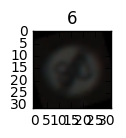

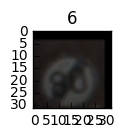

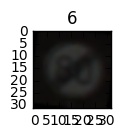

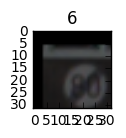

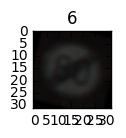

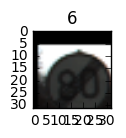

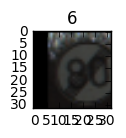

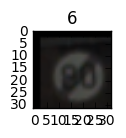

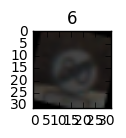

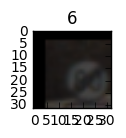

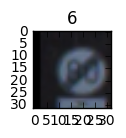

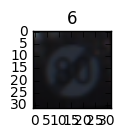

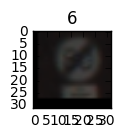

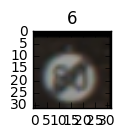

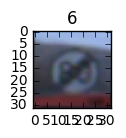

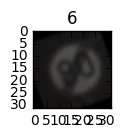

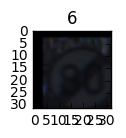

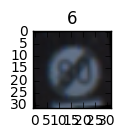

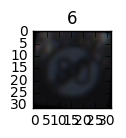

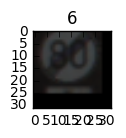

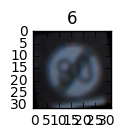

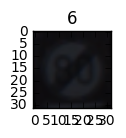

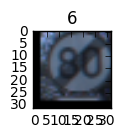

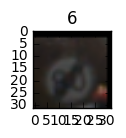

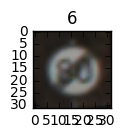

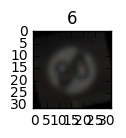

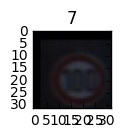

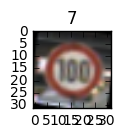

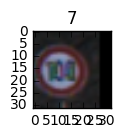

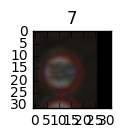

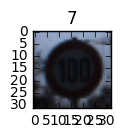

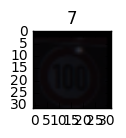

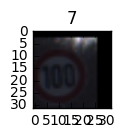

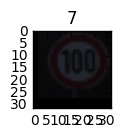

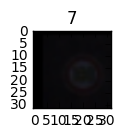

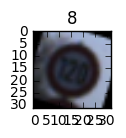

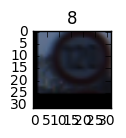

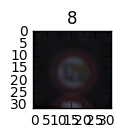

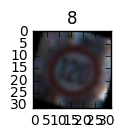

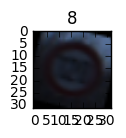

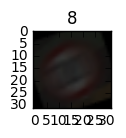

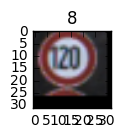

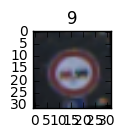

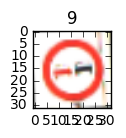

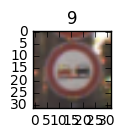

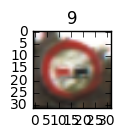

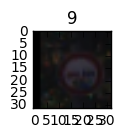

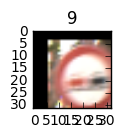

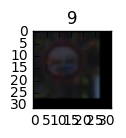

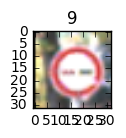

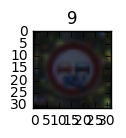

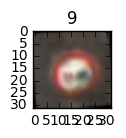

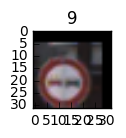

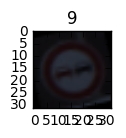

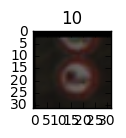

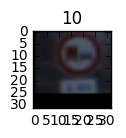

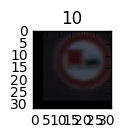

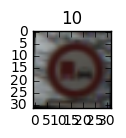

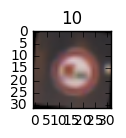

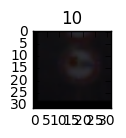

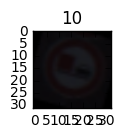

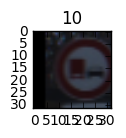

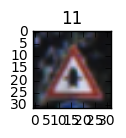

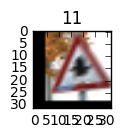

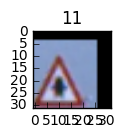

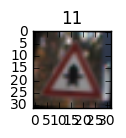

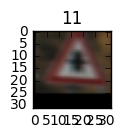

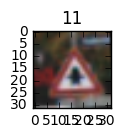

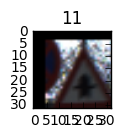

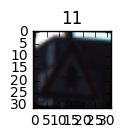

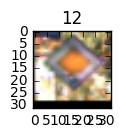

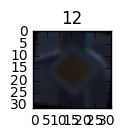

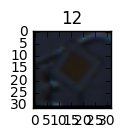

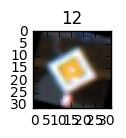

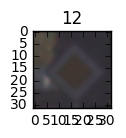

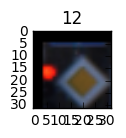

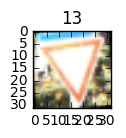

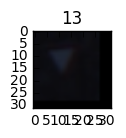

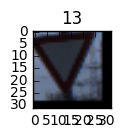

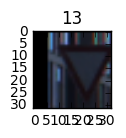

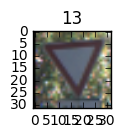

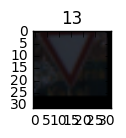

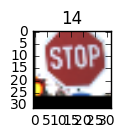

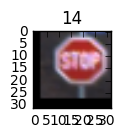

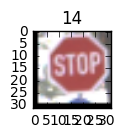

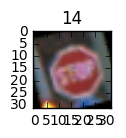

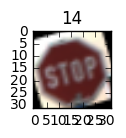

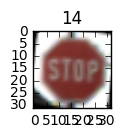

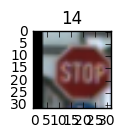

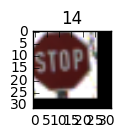

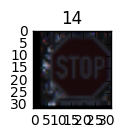

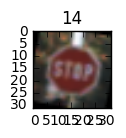

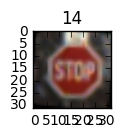

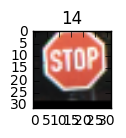

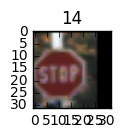

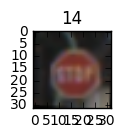

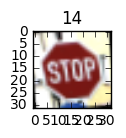

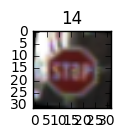

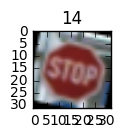

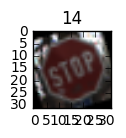

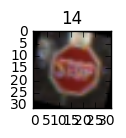

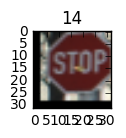

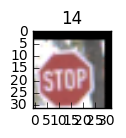

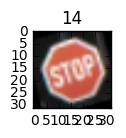

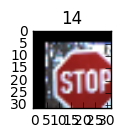

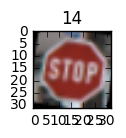

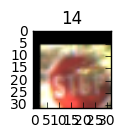

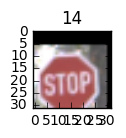

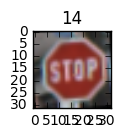

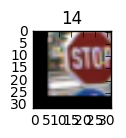

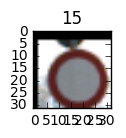

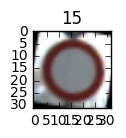

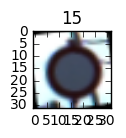

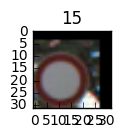

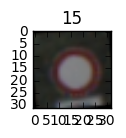

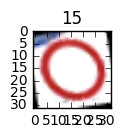

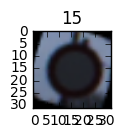

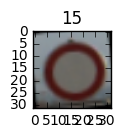

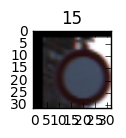

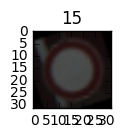

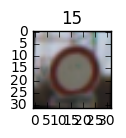

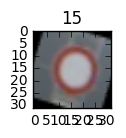

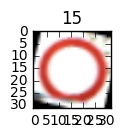

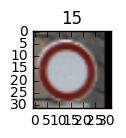

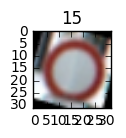

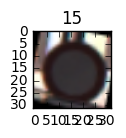

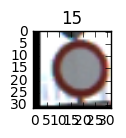

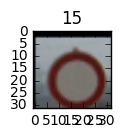

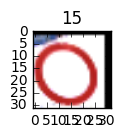

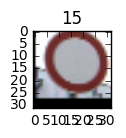

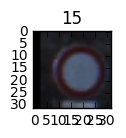

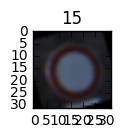

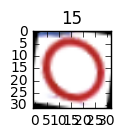

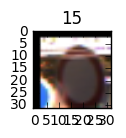

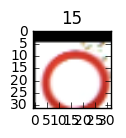

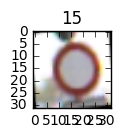

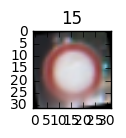

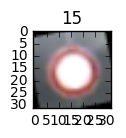

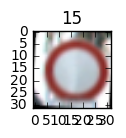

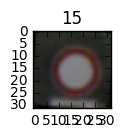

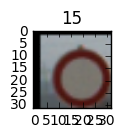

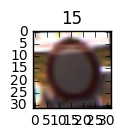

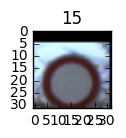

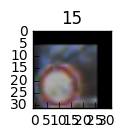

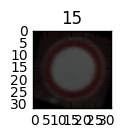

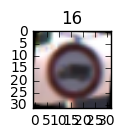

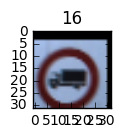

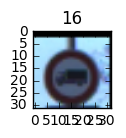

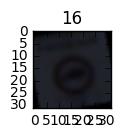

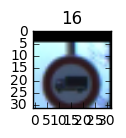

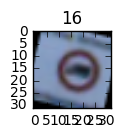

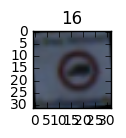

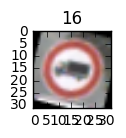

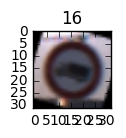

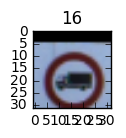

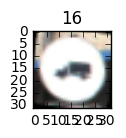

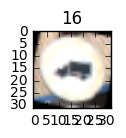

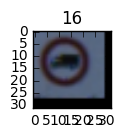

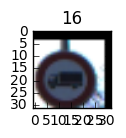

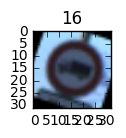

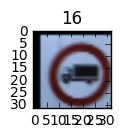

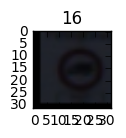

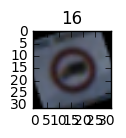

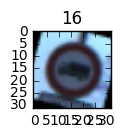

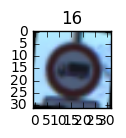

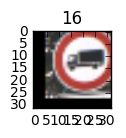

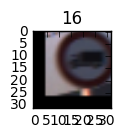

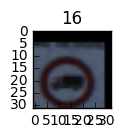

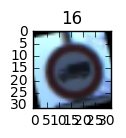

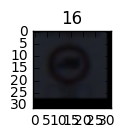

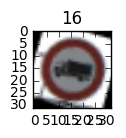

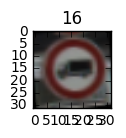

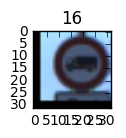

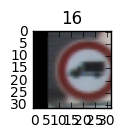

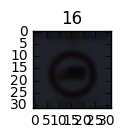

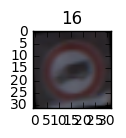

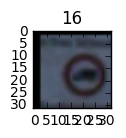

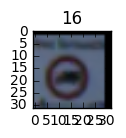

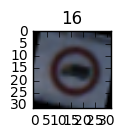

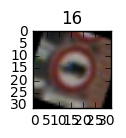

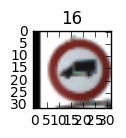

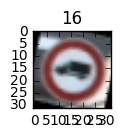

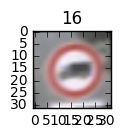

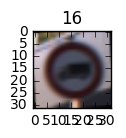

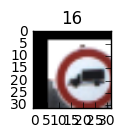

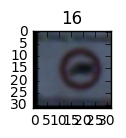

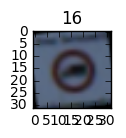

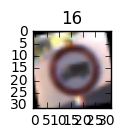

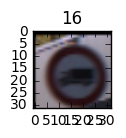

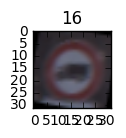

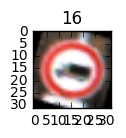

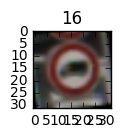

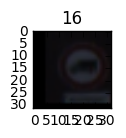

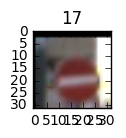

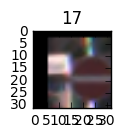

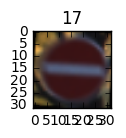

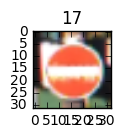

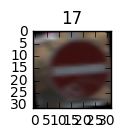

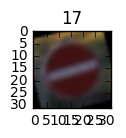

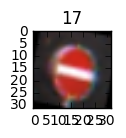

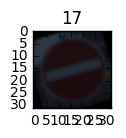

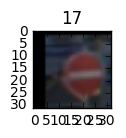

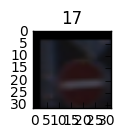

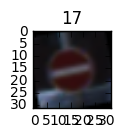

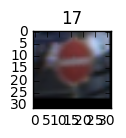

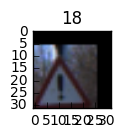

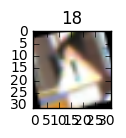

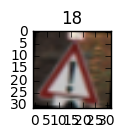

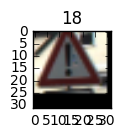

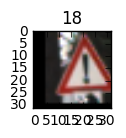

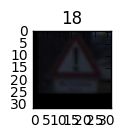

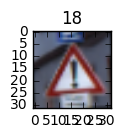

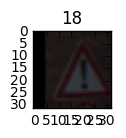

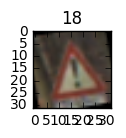

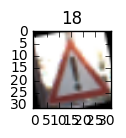

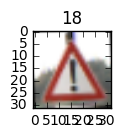

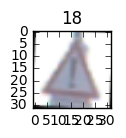

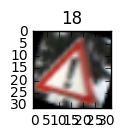

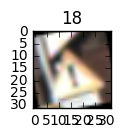

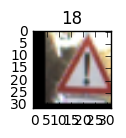

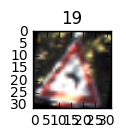

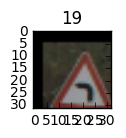

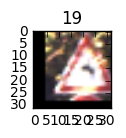

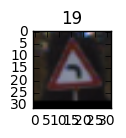

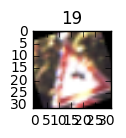

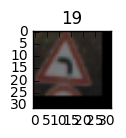

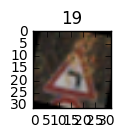

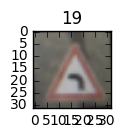

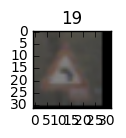

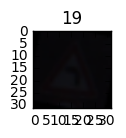

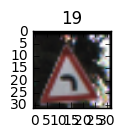

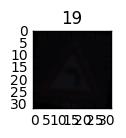

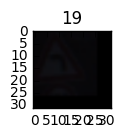

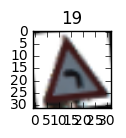

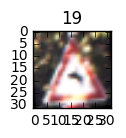

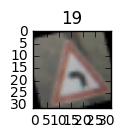

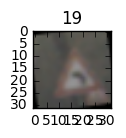

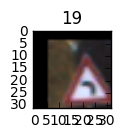

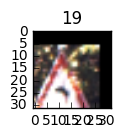

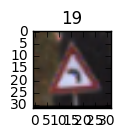

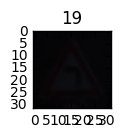

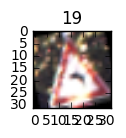

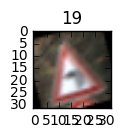

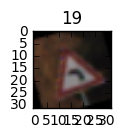

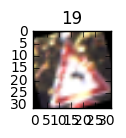

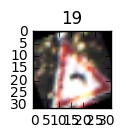

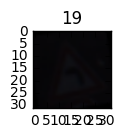

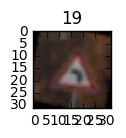

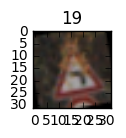

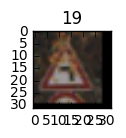

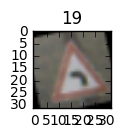

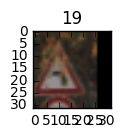

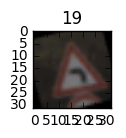

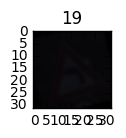

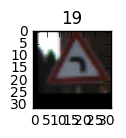

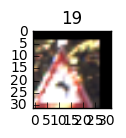

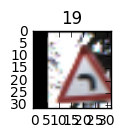

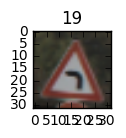

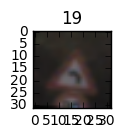

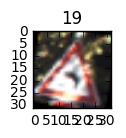

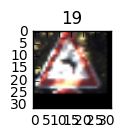

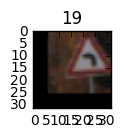

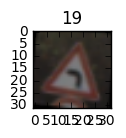

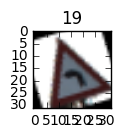

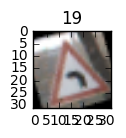

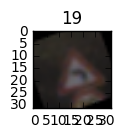

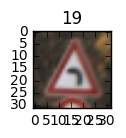

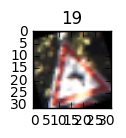

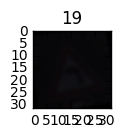

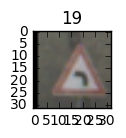

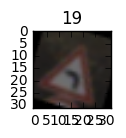

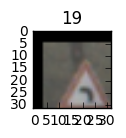

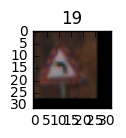

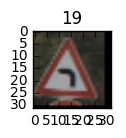

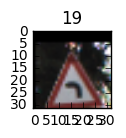

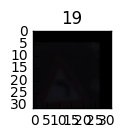

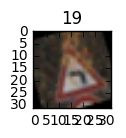

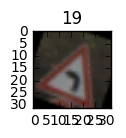

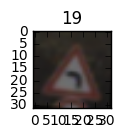

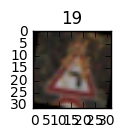

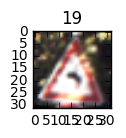

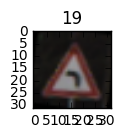

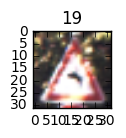

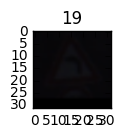

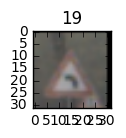

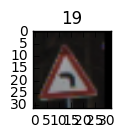

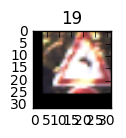

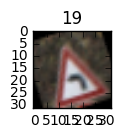

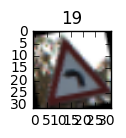

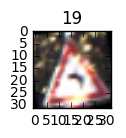

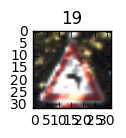

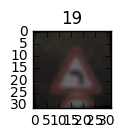

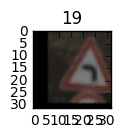

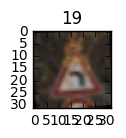

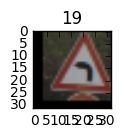

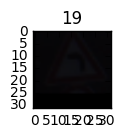

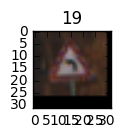

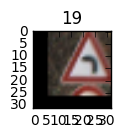

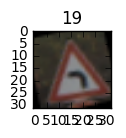

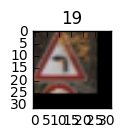

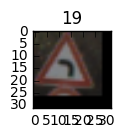

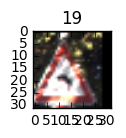

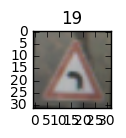

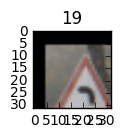

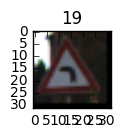

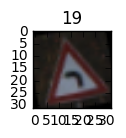

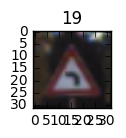

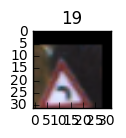

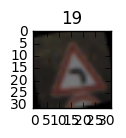

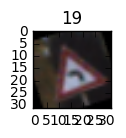

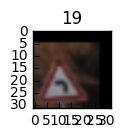

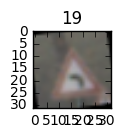

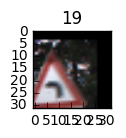

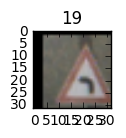

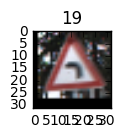

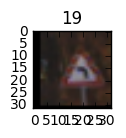

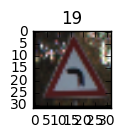

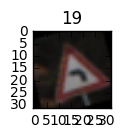

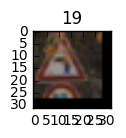

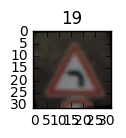

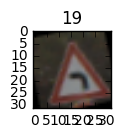

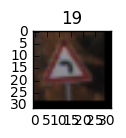

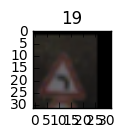

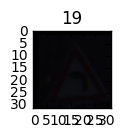

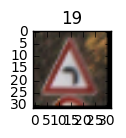

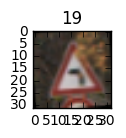

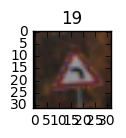

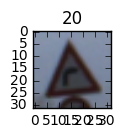

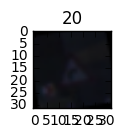

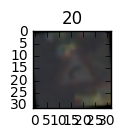

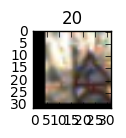

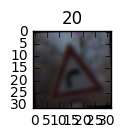

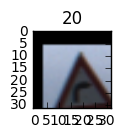

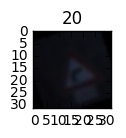

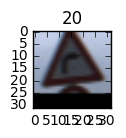

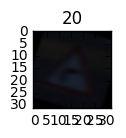

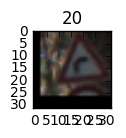

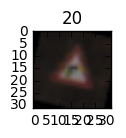

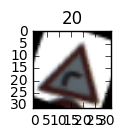

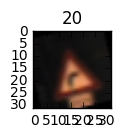

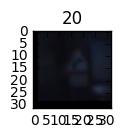

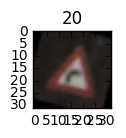

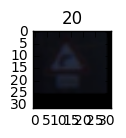

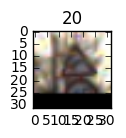

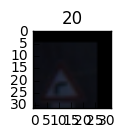

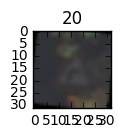

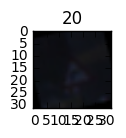

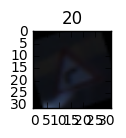

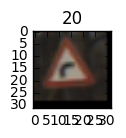

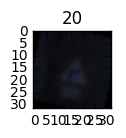

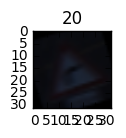

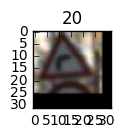

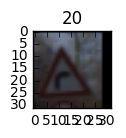

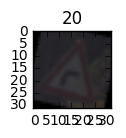

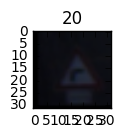

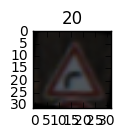

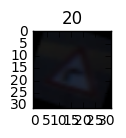

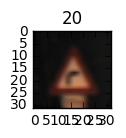

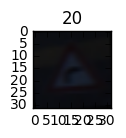

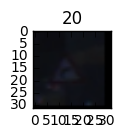

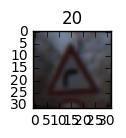

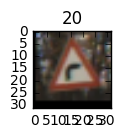

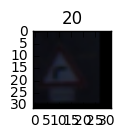

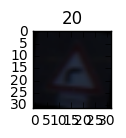

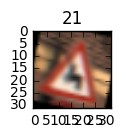

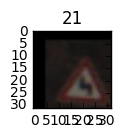

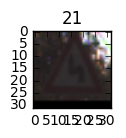

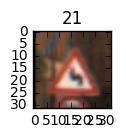

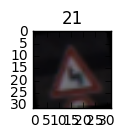

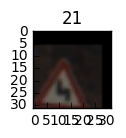

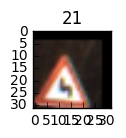

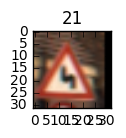

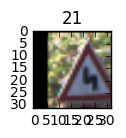

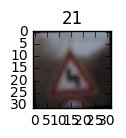

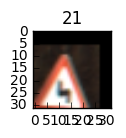

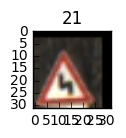

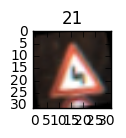

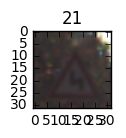

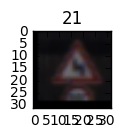

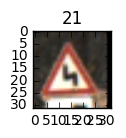

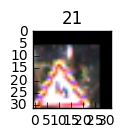

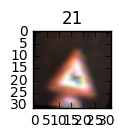

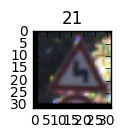

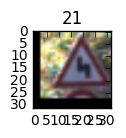

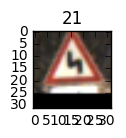

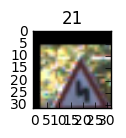

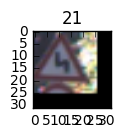

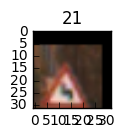

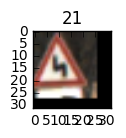

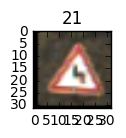

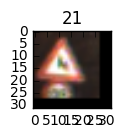

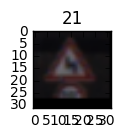

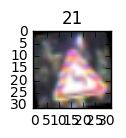

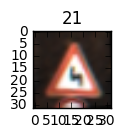

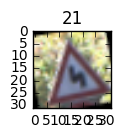

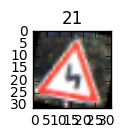

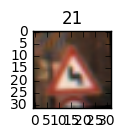

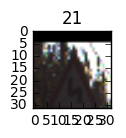

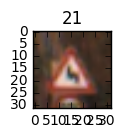

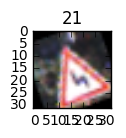

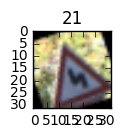

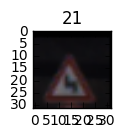

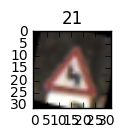

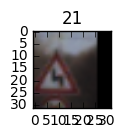

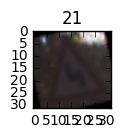

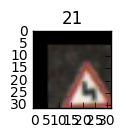

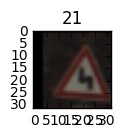

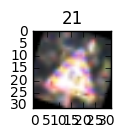

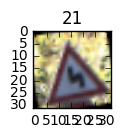

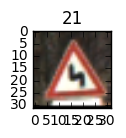

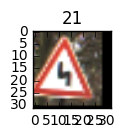

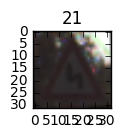

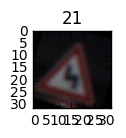

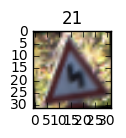

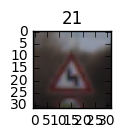

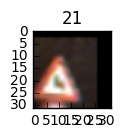

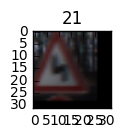

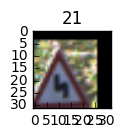

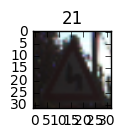

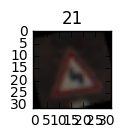

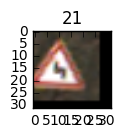

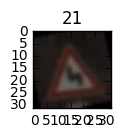

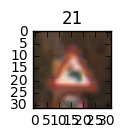

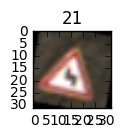

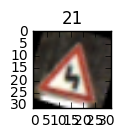

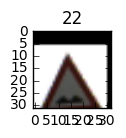

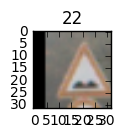

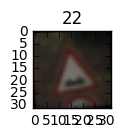

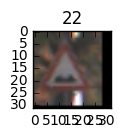

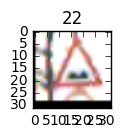

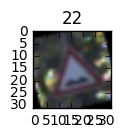

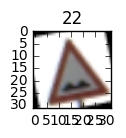

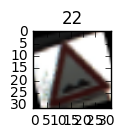

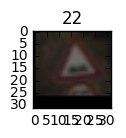

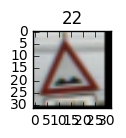

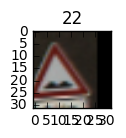

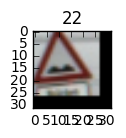

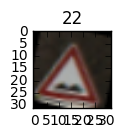

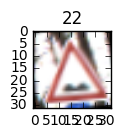

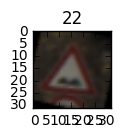

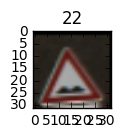

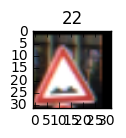

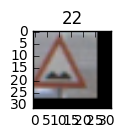

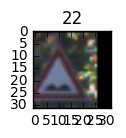

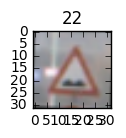

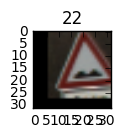

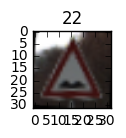

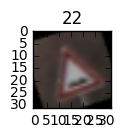

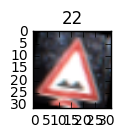

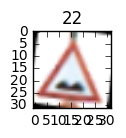

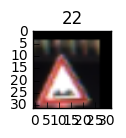

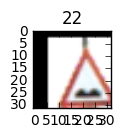

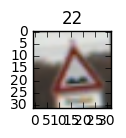

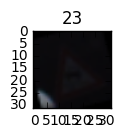

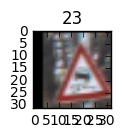

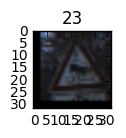

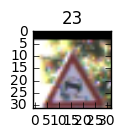

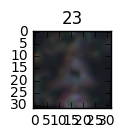

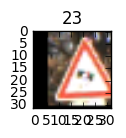

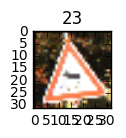

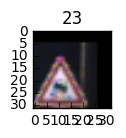

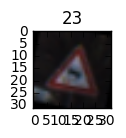

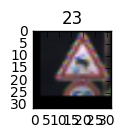

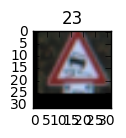

In [ ]:
unique_signs_train=np.array(np.unique(y_train,return_counts=True,return_index=True)).T

#unique_signs_train=[tuple(unique_signs_train[0]),tuple(unique_signs_train[1]),tuple(unique_signs_train[2])]

max_signs = max(np.array(np.unique(y_train,return_counts=True,return_index=True)[2]))

max_generation = int(1.1*max(unique_signs_train[2]))

X_train, y_train = augment_data(X_train,y_train,unique_signs_train,max_signs)

In [ ]:

plt.figure(figsize=(1,1))
plt.imshow(X_train[39214])



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
def min_max_normalization(x,min,max):
    """
    This function takes an n by m array and normalizes each value based on the average of min and max values
    of the RBG scale (min=0 and max=255).
    It return an n by m array
    """
    avg_value=(max+min)/2.0
    norm_array = np.zeros(x.shape)+avg_value
    normalized_x= (x-norm_array)/norm_array
    return normalized_x

In [ ]:
#Normalize the training and test set usign min_,ax_normailzation from above
X_train= min_max_normalization(X_train,min=0,max=255)
X_test= min_max_normalization(X_test,min=0,max=255)

In [ ]:
#Shuffle the training set
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train, random_state=88)

In [ ]:
#split training set into training and validation set
from sklearn.cross_validation import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train,y_train, test_size=0.1, random_state=88)

In [ ]:
#used bar example from mathplotlib link provided above
unique_signs=np.unique(y_validation,return_counts=True,return_index=True)
sign_type = unique_signs[0]
y_pos = np.arange(len(unique_signs[0]))
count = unique_signs[2]

plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
plt.barh(y_pos, count,  align='center', alpha=0.4)
plt.yticks(y_pos, sign_type)
plt.xlabel('Count')
plt.title('How many training examples of each sign?')



plt.show()

# LeNet Implemenation
The LeNet implementation is the code used from the LeNet lab at the end of the CNN lesson on Udacity

The validation and processing code comes from the lab notebook as well

In [ ]:
import tensorflow as tf

EPOCHS = 30
BATCH_shape = 128

In [ ]:
from tensorflow.contrib.layers import flatten
tf.reset_default_graph()
def LeNet(x,keep_prob):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    weights = {
        "w_cnn_l1":[5,5,3,6],
        "w_cnn_p1":{
            "kshape":[1,2,2,1],
            "stride":[1,2,2,1]
        },
        "w_cnn_l2":[5,5,6,16],
        "w_cnn_p2":{
            "kshape":[1,2,2,1],
            "stride":[1,2,2,1]
        },
        "w_fl_l3":[400,120],
        "w_fl_l4":[120,84],
        "w_fl_l5":[84,43]
    }
    biases = {
        "b_l1":6,
        "b_l2":16,
        "b_l3":120,
        "b_l4":84,
        "b_l5":43
    }
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    weights_l1=tf.Variable(tf.truncated_normal(shape=weights["w_cnn_l1"],mean=mu,stddev=sigma))
    bias_l1=tf.Variable(tf.zeros(biases["b_l1"]))
    conv_layer = tf.nn.conv2d(x,weights_l1,strides=[1,1,1,1],padding='VALID')
    conv_layer=tf.nn.bias_add(conv_layer,bias_l1)
    # TODO: Activation.
    conv_layer=tf.nn.relu(conv_layer)
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv_layer=tf.nn.max_pool(
        conv_layer,
    ksize=weights["w_cnn_p1"]["kshape"],
    strides=weights["w_cnn_p1"]["stride"],
    padding="SAME")
    
    conv_layer=tf.nn.dropout(conv_layer,keep_prob)
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    weights_l2=tf.Variable(tf.truncated_normal(shape=weights["w_cnn_l2"],mean=mu,stddev=sigma))
    bias_l2=tf.Variable(tf.zeros(biases["b_l2"]))
    conv_layer = tf.nn.conv2d(conv_layer,weights_l2,strides=[1,1,1,1],padding='VALID')
    conv_layer=tf.nn.bias_add(conv_layer,bias_l2)
    # TODO: Activation.
    conv_layer=tf.nn.relu(conv_layer)
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv_layer=tf.nn.max_pool(
        conv_layer,
    ksize=weights["w_cnn_p2"]["kshape"],
    strides=weights["w_cnn_p2"]["stride"],
    padding="SAME")
    conv_layer=tf.nn.dropout(conv_layer,keep_prob)
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    conv_layer = flatten(conv_layer)
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    weights_l3=tf.Variable(tf.truncated_normal(shape=weights["w_fl_l3"],mean=mu,stddev=sigma))
    bias_l3=tf.Variable(tf.zeros(biases["b_l3"]))
    conv_layer=tf.add(tf.matmul(conv_layer,weights_l3),bias_l3)
    # TODO: Activation.
    conv_layer=tf.nn.relu(conv_layer)
    conv_layer=tf.nn.dropout(conv_layer,keep_prob)
    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    weights_l4=tf.Variable(tf.truncated_normal(shape=weights["w_fl_l4"],mean=mu,stddev=sigma))
    bias_l4=tf.Variable(tf.zeros(biases["b_l4"]))
    conv_layer=tf.add(tf.matmul(conv_layer,weights_l4),bias_l4)
    # TODO: Activation.
    conv_layer=tf.nn.relu(conv_layer)
    conv_layer=tf.nn.dropout(conv_layer,keep_prob)
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    weights_l5=tf.Variable(tf.truncated_normal(shape=weights["w_fl_l5"],mean=mu,stddev=sigma))
    bias_l5=tf.Variable(tf.zeros(biases["b_l5"]))
    logits=tf.add(tf.matmul(conv_layer,weights_l5),bias_l5)
    return logits

In [ ]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob=tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

In [ ]:
rate = 0.001
prob=0.8

logits = LeNet(x,keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [ ]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_shape):
        batch_x, batch_y = X_data[offset:offset+BATCH_shape], y_data[offset:offset+BATCH_shape]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:prob})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [ ]:

with tf.Session() as sess:
    #sess.run(tf.global_variables_initializer())
    saver.restore(sess,'/src/traffic_signs_dropout.ckpt')
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_shape):
            end = offset + BATCH_shape
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:prob})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'traffic_signs_dropout.ckpt')
    print("Model saved")

In [ ]:
#Test sample accuracy
with tf.Session() as sess:
    #sess.run(tf.global_variables_initializer())
    saver.restore(sess,'/src/traffic_signs_dropout.ckpt')

    test_accuracy = evaluate(X_test, y_test)
    print("EPOCH {} ...".format(i+1))
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    print()

# Inception
Below is an inception model to classify traffic signs

In [ ]:
import tensorflow as tf

EPOCHS = 5
BATCH_shape = 256
print(X_train.shape)

In [ ]:
def layer_dim_parameters(input_height,
                         input_width,
                         input_depth,
                         filter_height,
                         filter_width,
                         output_depth,
                         stride,
                         padding):
    """
    This function takes in an input images dimensions, filter dimensions, output_depth, stride and padding
    for a convnet.
    It only calculates for 'VALID' padding.
    It returns the output_height, output_width and the number of parameters in the layer
    """
    output_height=(input_height-filter_height+2*padding)/stride+1
    output_width=(input_height-filter_height+2*padding)/stride+1
    parameters = (output_height*output_width*input_depth+1)*output_depth
    return output_height, output_width, parameters

In [50]:
#Layer size calculations
input_height,input_width,input_depth=X_train[1].shape
filter_concat=0
#1x1x6 output
filter_height=1
filter_width=1
output_depth=6
stride=1
padding=0
input_height, input_width, parameters = layer_dim_parameters(input_height,
                                                               input_width,
                                                               input_depth,
                                                               filter_height,
                                                               filter_width,
                                                               output_depth,
                                                               stride,
                                                               padding)
print("1x1x6 filter output HxWxD = {:}x{:}x{:}".format(input_height, input_width,output_depth))
print("1x1x6 number of parameters = {:}".format(parameters))

#1x1x12 output
filter_height=1
filter_width=1
input_depth=6
output_depth=12
stride=1
padding=0
output_height_1, output_width_1, parameters = layer_dim_parameters(input_height,
                                                               input_width,
                                                               input_depth,
                                                               filter_height,
                                                               filter_width,
                                                               output_depth,
                                                               stride,
                                                               padding)
print("#1x1x10 filter output HxWxD = {:}x{:}x{:}".format(output_height_1, output_width_1,output_depth))
print("#1x1x10 number of parameters = {:}".format(parameters))
filter_concat+=output_height_1* output_width_1*output_depth

#3x3x12 output
filter_height=3
filter_width=3
input_depth=6
output_depth=12
stride=1
padding=0
output_height_3, output_width_3, parameters = layer_dim_parameters(input_height,
                                                               input_width,
                                                               input_depth,
                                                               filter_height,
                                                               filter_width,
                                                               output_depth,
                                                               stride,
                                                               padding)
print("#3x3x10 filter output HxWxD = {:}x{:}x{:}".format(output_height_3, output_width_3,output_depth))
print("#3x3x10 number of parameters = {:}".format(parameters))
filter_concat+=output_height_3* output_width_3*output_depth

#5x5x12 output
filter_height=5
filter_width=5
input_depth=6
output_depth=12
stride=1
padding=0
output_height_5, output_width_5, parameters = layer_dim_parameters(input_height,
                                                               input_width,
                                                               input_depth,
                                                               filter_height,
                                                               filter_width,
                                                               output_depth,
                                                               stride,
                                                               padding)
print("#5x5x10 filter output HxWxD = {:}x{:}x{:}".format(output_height_5, output_width_5,output_depth))
print("#5x5x10 number of parameters = {:}".format(parameters))
filter_concat+=output_height_5* output_width_5*output_depth

#pooling layer 4x4
filter_height=4
filter_width=4
S=2
new_height = (input_height - filter_height)/S + 1
new_width = (input_width - filter_width)/S + 1
print("#4x4x3 pooling filter output HxWxD = {:}x{:}x{:}".format(new_height, new_width,X_train[1].shape[2]))
print("#4x4x3 number of parameters = {:}".format(parameters))

#1x1x12 output
filter_height=1
filter_width=1
input_depth=3
output_depth=12
stride=1
new_height, new_width, parameters = layer_dim_parameters(new_height,
                                                               new_width,
                                                               input_depth,
                                                               filter_height,
                                                               filter_width,
                                                               output_depth,
                                                               stride,
                                                               padding)

print("#1x1x12 filter output HxWxD = {:}x{:}x{:}".format(new_height, new_width,12))
print("#1x1x12 number of parameters = {:}".format(parameters))
filter_concat+=new_height* new_width*12

#fully connected layer

print("Filter concat = {:}".format(filter_concat))


ValueError: not enough values to unpack (expected 3, got 2)

In [ ]:
from tensorflow.contrib.layers import flatten
tf.reset_default_graph()
def Inception(x,keep_prob):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    weights = {
        "w_cnn_l1":[1,1,3,6],
        "w_cnn_l1_10":[1,1,6,12],
        "w_cnn_p1":{
            "kshape":[1,4,4,1],
            "stride":[1,2,2,1]
        },
        "w_cnn_pool_1":[1,1,3,12],
        "w_cnn_l2":[3,3,6,12],
        "w_cnn_p2":{
            "kshape":[1,3,3,1],
            "stride":[1,2,2,1]
        },
        "w_fl_l3":[35568,800],
        "w_fl_l4":[800,300],
        "w_fl_l5":[300,120],
        "w_cnn_l3":[5,5,6,12],
        "w_fl_l7":[120,43]
    }
    biases = {
        "b_l1":6,
        "b_l1_10":12,
        "b_l2":12,
        "b_l3":800,
        "b_l4":300,
        "b_l5":120,
        "b_l6":12,
        "b_l7":43
    }
    
    #1x1x6 filter output HxWxD = 32.0x32.0x6
    #1x1x6 number of parameters = 18438.0
    weights_l1=tf.Variable(tf.truncated_normal(shape=weights["w_cnn_l1"],mean=mu,stddev=sigma))
    bias_l1=tf.Variable(tf.zeros(biases["b_l1"]))
    conv_layer_1 = tf.nn.conv2d(x,weights_l1,strides=[1,1,1,1],padding='VALID')
    conv_layer_1=tf.nn.bias_add(conv_layer_1,bias_l1)
    
    #Activation and dropout
    conv_layer_1=tf.nn.relu(conv_layer_1)
    conv_layer_1=tf.nn.dropout(conv_layer_1,keep_prob)
    
    #1x1x12 filter output HxWxD = 32.0x32.0x12
    #1x1x12 number of parameters = 73740.0
    weights_l1_10=tf.Variable(tf.truncated_normal(shape=weights["w_cnn_l1_10"],mean=mu,stddev=sigma))
    bias_l1_10=tf.Variable(tf.zeros(biases["b_l1_10"]))
    conv_layer_1_10 = tf.nn.conv2d(conv_layer_1,weights_l1_10,strides=[1,1,1,1],padding='VALID')
    conv_layer_1_10=tf.nn.bias_add(conv_layer_1_10,bias_l1_10)
    
    #Activation and dropout
    conv_layer_1_10=tf.nn.relu(conv_layer_1_10)
    conv_layer_1=tf.nn.dropout(conv_layer_1,keep_prob)
    
    #pooling layer
    conv_layer_pool=tf.nn.max_pool(
        x,
    ksize=weights["w_cnn_p1"]["kshape"],
    strides=weights["w_cnn_p1"]["stride"],
    padding="SAME")
    conv_layer_pool=tf.nn.relu(conv_layer_pool) #tired removing activation after pooling
    #conv_layer_pool=tf.nn.dropout(conv_layer_pool,keep_prob)
    
    #1x1x12 filter output HxWxD = 15.0x15.0x12
    #1x1x12 number of parameters = 8112.0
    weights_pool=tf.Variable(tf.truncated_normal(shape=weights["w_cnn_pool_1"],mean=mu,stddev=sigma))
    bias_pool=tf.Variable(tf.zeros(biases["b_l2"]))
    conv_layer_pool_1 = tf.nn.conv2d(conv_layer_pool,weights_pool,strides=[1,1,1,1],padding='VALID')
    conv_layer_pool_1=tf.nn.bias_add(conv_layer_pool_1,bias_pool)
    conv_layer_pool_1=tf.nn.relu(conv_layer_pool_1)
    conv_layer_pool_1=tf.nn.dropout(conv_layer_pool_1,keep_prob)
    
    #3x3x12 filter output HxWxD = 30.0x30.0x12
    #3x3x12 number of parameters = 64812.0
    weights_l2=tf.Variable(tf.truncated_normal(shape=weights["w_cnn_l2"],mean=mu,stddev=sigma))
    bias_l2=tf.Variable(tf.zeros(biases["b_l2"]))
    conv_layer_3 = tf.nn.conv2d(conv_layer_1,weights_l2,strides=[1,1,1,1],padding='VALID')
    conv_layer_3=tf.nn.bias_add(conv_layer_3,bias_l2)
    
    #Activation and dropout
    conv_layer_3=tf.nn.relu(conv_layer_3)
    conv_layer_3=tf.nn.dropout(conv_layer_3,keep_prob)
    
    #5x5x12 filter output HxWxD = 28.0x28.0x12
    #5x5x12 number of parameters = 56460.0
    weights_l6=tf.Variable(tf.truncated_normal(shape=weights["w_cnn_l3"],mean=mu,stddev=sigma))
    bias_l6=tf.Variable(tf.zeros(biases["b_l6"]))
    conv_layer_5 = tf.nn.conv2d(conv_layer_1,weights_l6,strides=[1,1,1,1],padding='VALID')
    conv_layer_5=tf.nn.bias_add(conv_layer_5,bias_l6)
    
    #Activation and dropout
    conv_layer_5=tf.nn.relu(conv_layer_5)
    conv_layer_5=tf.nn.dropout(conv_layer_5,keep_prob)
    
    #Concatenate previous layers together
    conv_layer_1_10 = flatten(conv_layer_1_10)
    conv_layer_pool_1 = flatten(conv_layer_pool_1)
    conv_layer_3 = flatten(conv_layer_3)
    conv_layer_5 = flatten(conv_layer_5)
    conv_layer = tf.concat(1 , [conv_layer_1_10,conv_layer_pool_1,conv_layer_3,conv_layer_5])
    
    #layer3 fully connect input = 35196 output = 800
    weights_l3=tf.Variable(tf.truncated_normal(shape=weights["w_fl_l3"],mean=mu,stddev=sigma))
    bias_l3=tf.Variable(tf.zeros(biases["b_l3"]))
    conv_layer=tf.add(tf.matmul(conv_layer,weights_l3),bias_l3)
    conv_layer=tf.nn.relu(conv_layer)
    conv_layer=tf.nn.dropout(conv_layer,keep_prob)
    
    #Layer 4: Fully Connected. Input = 800. Output = 300.
    weights_l4=tf.Variable(tf.truncated_normal(shape=weights["w_fl_l4"],mean=mu,stddev=sigma))
    bias_l4=tf.Variable(tf.zeros(biases["b_l4"]))
    conv_layer=tf.add(tf.matmul(conv_layer,weights_l4),bias_l4)
    conv_layer=tf.nn.relu(conv_layer)
    conv_layer=tf.nn.dropout(conv_layer,keep_prob)
    
    #Layer 5: Fully Connected. Input = 300. Output = 120.
    weights_l5=tf.Variable(tf.truncated_normal(shape=weights["w_fl_l5"],mean=mu,stddev=sigma))
    bias_l5=tf.Variable(tf.zeros(biases["b_l5"]))
    conv_layer=tf.add(tf.matmul(conv_layer,weights_l5),bias_l5)
    conv_layer=tf.nn.relu(conv_layer)
    conv_layer=tf.nn.dropout(conv_layer,keep_prob)
    
    #Layer 6: Fully Connected. Input = 120. Output = 43.
    weights_l7=tf.Variable(tf.truncated_normal(shape=weights["w_fl_l7"],mean=mu,stddev=sigma))
    bias_l7=tf.Variable(tf.zeros(biases["b_l7"]))
    logits=tf.add(tf.matmul(conv_layer,weights_l7),bias_l7)
    
    return logits

In [ ]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob=tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

In [ ]:

learning_rate = 0.001
prob=0.95




logits = Inception(x,keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation)

In [ ]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_shape):
        batch_x, batch_y = X_data[offset:offset+BATCH_shape], y_data[offset:offset+BATCH_shape]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [ ]:
with tf.Session() as sess:
    #sess.run(tf.initialize_all_variables())
    saver.restore(sess,'traffic_signs_inception_dropout_fixed_256batch_95keep_prob_v2_augment.ckpt')
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_shape):
            end = offset + BATCH_shape
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:prob})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'traffic_signs_inception_dropout_fixed_256batch_95keep_prob_v2_augment.ckpt')
    print("Model saved")

In [ ]:
#Test sample accuracy
with tf.Session() as sess:
    #sess.run(tf.global_variables_initializer())
    saver.restore(sess,'traffic_signs_inception_dropout_fixed_256batch_95keep_prob_v2_augment.ckpt')

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    print()

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_



**Answer:**
I used min and max average normalization for each color layer of the input images to cetner around a mean of 0 with min and max normalized values of -1 and 1 respectively. I chose this method of normalization because of the simplicity and effectiveness. I chose to leave all three layers of color because of the additional information that is left the model with the image being 3 layers in depth.

I also went with min and max normalization and left all 3 layers because I wanted to implement an inception model with depth. Leaving the base as deep as possible seemed like a good idea.

I also shuffled the data so the input data was not in sequential order when running through the batches. I did this because have the data sequentially ordered in this way seemed like it may have impacts on the optimization of the weights since the model would be ran in batches.

I had considered balancing the number examples per class since I could see that it was quite imbalanced. Once I researched balancing the classes by oversampling under representented classes and undersampling over represented classes I chose to do nothing. Oversampling seemed like it could lead to mistrepresntation of weights since there would be the same example more than once and undersampling seemed like it would ignore too much data and neural networks are trained better with more data. This is why I chose to do nothing.

In [ ]:
##Generate data
#helper functions for "warping images"
import cv2
def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    # return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
def translation(img, shift_x,shift_y):
    """
    This function takes in an image of, HxWxD, two integers, shift_x and shift_y
    
    It returns an image of of, HxWxD, the was translated in the x direction by shift_x and y direction by shift_y
    """
    rows,cols = img.shape[0:2]
    M = np.float32([[1,0,shift_x],[0,1,shift_y]])
    return cv2.warpAffine(img,M,(cols,rows))

def rotation(img, rotation_angle):
     """
    This function takes in an image of, HxWxD, one integer rotation_angle
    
    It returns an image of of, HxWxD, the was rotated on it center by the angle rotation_angle
    """
    rows,cols = img.shape[0:2]

    M = cv2.getRotationMatrix2D((cols/2,rows/2),rotation_angle,1)
    return cv2.warpAffine(img,M,(cols,rows))

In [ ]:
#create warp_image pipeline and augment_data function
def warp_images(img):
    """
    This function takes in an image and randomly will either rotate the image by a random angle -20 to 20
    or
    it will translate an image randomly in the x and y direction by -6 to 6
    
    it returns the warped image of the same size as the input image
    """
    position = np.random.randint(low=0,high=10,size=1)
    if position%2 ==1:
        rotation_angle = np.random.randint(low=-20,high=21,size=1)
        img= rotation(img, rotation_angle)
    if position%2 ==0:
        shift = np.random.randint(low=-6,high=7, size=2)
        img=translation(img, shift[0],shift[1])
    return img

def augment_data (data_set_features,data_set_labels,unique_labels,max_sign_count):
    """
    THis funtion takes in a 4D array of images, data_set_features, 
    2d array of labels, data_set_labels
    unique labels of label, position and count, unique_labels and
    the max count of a unqiue sign in the data set, max_sign_count
    
    It loops through eash unqiue label, position and count to augment the data set 
    by creating augmented images that are append to the training set with the corresponding label appended 
    to the label training set.
    
    It returns the augmented training data set and training labels with the original data and the audmented data
    """
    data_set_features_augmented = np.copy(data_set_features)
    data_set_labels_augmented = np.copy(data_set_labels)
    for label, position, count in unique_labels:
        lower_range = position
        upper_range = position + count
        max_signs=int(max_sign_count/count*np.random.randint(low=5,high=11,size=1)[0])
        i=0
        while i < max_signs:
            i +=1
            rand_sample=np.random.randint(low=lower_range,high=upper_range,size=1)
            img=warp_images(data_set_features[rand_sample[0]])
            plt.figure(figsize=(1,1))
            plt.title(label)
            plt.imshow(img)
            data_set_features_augmented=np.concatenate((data_set_features_augmented,np.array(img)[np.newaxis,...]))
            data_set_labels_augmented=np.append(data_set_labels_augmented,np.array(label)[np.newaxis,...],axis=0)
    return data_set_features_augmented, data_set_labels_augmented

In [ ]:
#generate augmetned data from existing data set
unique_signs_train=np.array(np.unique(y_train,return_counts=True,return_index=True)).T #label, position, count

max_signs = max(np.array(np.unique(y_train,return_counts=True,return_index=True)[2])) #max unique sign count

X_train, y_train = augment_data(X_train,y_train,unique_signs_train,max_signs) #augmented data sets

In [ ]:
#create normalizing function to normailize augmented data set
def min_max_normalization(x,min,max):
    """
    This function takes an n by m array and normalizes each value based on the average of min and max values
    of the RBG scale (min=0 and max=255).
    
    It return an n by m array
    """
    avg_value=(max+min)/2.0
    norm_array = np.zeros(x.shape)+avg_value
    normalized_x= (x-norm_array)/norm_array
    return normalized_x

In [ ]:
#Normalize the training and test set usign min_,ax_normailzation from above
X_train= min_max_normalization(X_train,min=0,max=255)
X_test= min_max_normalization(X_test,min=0,max=255)

In [ ]:
#Shuffle the training set
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train, random_state=88)

In [ ]:
###split the data into training/validation/testing sets here.

from sklearn.cross_validation import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train,y_train, test_size=0.1, random_state=88)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_



**Answer:**
I used the provided test set that was given to us in a pickle as the test set. I used the sklearn.cross_validation.train_test_split function to randomly split the training data provided in the pickle into a subset of training data and validation data. I set the validation set to be 10% of the original data set with random state set to 88. Although since I have generated data and I did not set a random state for the data that was generated the training and validation set will always differ from data load to model training.

I generated more data by taking the training set and randomly augmenting the data by eaither rotating the image or translating it (resizing the image with the same pixel size). I rotated images by a random 10 to 35 degress. I translated images by a random 0 to 8 pixels in the x and y direction. Originally I had included scaling but that didn't working becuase the images were no longer the same dimensions. I used the opencv library to augment existing training data as new examples. I also randomly selected the the amount of additional examples to generate with a range of max unqiue sign count divided by current unqiue sign count times 5 to 10 more of the original examples. I generated more data because I capped out at 89% test accuracy (I wasn't supposed to see my test accuracy more than once) and my mentor Indra suggested I could augment the existing data to make the model more robust. This was also a great exercise to become more familiar with the opencv library.

There will be 3 main differences in the generated data. Each generated image will have some black region in it for both the rotated and translated images. The rotated images will have a different anlge from the previous image. I did not change the angle beyond 45 degrees because I was worried this would impact direction signs. The translated images may have a portion of the sign that was cut out due to the translation.


In [ ]:
### Define your architecture here.
import tensorflow as tf
from tensorflow.contrib.layers import flatten
tf.reset_default_graph()
def Inception(x,keep_prob):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    weights = {
        "w_cnn_l1":[1,1,3,6],
        "w_cnn_l1_10":[1,1,6,12],
        "w_cnn_p1":{
            "kshape":[1,4,4,1],
            "stride":[1,2,2,1]
        },
        "w_cnn_pool_1":[1,1,3,12],
        "w_cnn_l2":[3,3,6,12],
        "w_cnn_p2":{
            "kshape":[1,3,3,1],
            "stride":[1,2,2,1]
        },
        "w_fl_l3":[35568,800],
        "w_fl_l4":[800,300],
        "w_fl_l5":[300,120],
        "w_cnn_l3":[5,5,6,12],
        "w_fl_l7":[120,43]
    }
    biases = {
        "b_l1":6,
        "b_l1_10":12,
        "b_l2":12,
        "b_l3":800,
        "b_l4":300,
        "b_l5":120,
        "b_l6":12,
        "b_l7":43
    }
    
    #1x1x6 filter output HxWxD = 32.0x32.0x6
    #1x1x6 number of parameters = 18438.0
    weights_l1=tf.Variable(tf.truncated_normal(shape=weights["w_cnn_l1"],mean=mu,stddev=sigma))
    bias_l1=tf.Variable(tf.zeros(biases["b_l1"]))
    conv_layer_1 = tf.nn.conv2d(x,weights_l1,strides=[1,1,1,1],padding='VALID')
    conv_layer_1=tf.nn.bias_add(conv_layer_1,bias_l1)
    
    #Activation and dropout
    conv_layer_1=tf.nn.relu(conv_layer_1)
    conv_layer_1=tf.nn.dropout(conv_layer_1,keep_prob)
    
    #1x1x12 filter output HxWxD = 32.0x32.0x12
    #1x1x12 number of parameters = 73740.0
    weights_l1_10=tf.Variable(tf.truncated_normal(shape=weights["w_cnn_l1_10"],mean=mu,stddev=sigma))
    bias_l1_10=tf.Variable(tf.zeros(biases["b_l1_10"]))
    conv_layer_1_10 = tf.nn.conv2d(conv_layer_1,weights_l1_10,strides=[1,1,1,1],padding='VALID')
    conv_layer_1_10=tf.nn.bias_add(conv_layer_1_10,bias_l1_10)
    
    #Activation and dropout
    conv_layer_1_10=tf.nn.relu(conv_layer_1_10)
    conv_layer_1=tf.nn.dropout(conv_layer_1,keep_prob)
    
    #pooling layer
    conv_layer_pool=tf.nn.max_pool(
        x,
    ksize=weights["w_cnn_p1"]["kshape"],
    strides=weights["w_cnn_p1"]["stride"],
    padding="SAME")
    conv_layer_pool=tf.nn.relu(conv_layer_pool) #tired removing activation after pooling
    #conv_layer_pool=tf.nn.dropout(conv_layer_pool,keep_prob)
    
    #1x1x12 filter output HxWxD = 15.0x15.0x12
    #1x1x12 number of parameters = 8112.0
    weights_pool=tf.Variable(tf.truncated_normal(shape=weights["w_cnn_pool_1"],mean=mu,stddev=sigma))
    bias_pool=tf.Variable(tf.zeros(biases["b_l2"]))
    conv_layer_pool_1 = tf.nn.conv2d(conv_layer_pool,weights_pool,strides=[1,1,1,1],padding='VALID')
    conv_layer_pool_1=tf.nn.bias_add(conv_layer_pool_1,bias_pool)
    conv_layer_pool_1=tf.nn.relu(conv_layer_pool_1)
    conv_layer_pool_1=tf.nn.dropout(conv_layer_pool_1,keep_prob)
    
    #3x3x12 filter output HxWxD = 30.0x30.0x12
    #3x3x12 number of parameters = 64812.0
    weights_l2=tf.Variable(tf.truncated_normal(shape=weights["w_cnn_l2"],mean=mu,stddev=sigma))
    bias_l2=tf.Variable(tf.zeros(biases["b_l2"]))
    conv_layer_3 = tf.nn.conv2d(conv_layer_1,weights_l2,strides=[1,1,1,1],padding='VALID')
    conv_layer_3=tf.nn.bias_add(conv_layer_3,bias_l2)
    
    #Activation and dropout
    conv_layer_3=tf.nn.relu(conv_layer_3)
    conv_layer_3=tf.nn.dropout(conv_layer_3,keep_prob)
    
    #5x5x12 filter output HxWxD = 28.0x28.0x12
    #5x5x12 number of parameters = 56460.0
    weights_l6=tf.Variable(tf.truncated_normal(shape=weights["w_cnn_l3"],mean=mu,stddev=sigma))
    bias_l6=tf.Variable(tf.zeros(biases["b_l6"]))
    conv_layer_5 = tf.nn.conv2d(conv_layer_1,weights_l6,strides=[1,1,1,1],padding='VALID')
    conv_layer_5=tf.nn.bias_add(conv_layer_5,bias_l6)
    
    #Activation and dropout
    conv_layer_5=tf.nn.relu(conv_layer_5)
    conv_layer_5=tf.nn.dropout(conv_layer_5,keep_prob)
    
    #Concatenate previous layers together
    conv_layer_1_10 = flatten(conv_layer_1_10)
    conv_layer_pool_1 = flatten(conv_layer_pool_1)
    conv_layer_3 = flatten(conv_layer_3)
    conv_layer_5 = flatten(conv_layer_5)
    conv_layer = tf.concat(1 , [conv_layer_1_10,conv_layer_pool_1,conv_layer_3,conv_layer_5])
    
    #layer3 fully connect input = 35196 output = 800
    weights_l3=tf.Variable(tf.truncated_normal(shape=weights["w_fl_l3"],mean=mu,stddev=sigma))
    bias_l3=tf.Variable(tf.zeros(biases["b_l3"]))
    conv_layer=tf.add(tf.matmul(conv_layer,weights_l3),bias_l3)
    conv_layer=tf.nn.relu(conv_layer)
    conv_layer=tf.nn.dropout(conv_layer,keep_prob)
    
    #Layer 4: Fully Connected. Input = 800. Output = 300.
    weights_l4=tf.Variable(tf.truncated_normal(shape=weights["w_fl_l4"],mean=mu,stddev=sigma))
    bias_l4=tf.Variable(tf.zeros(biases["b_l4"]))
    conv_layer=tf.add(tf.matmul(conv_layer,weights_l4),bias_l4)
    conv_layer=tf.nn.relu(conv_layer)
    conv_layer=tf.nn.dropout(conv_layer,keep_prob)
    
    #Layer 5: Fully Connected. Input = 300. Output = 120.
    weights_l5=tf.Variable(tf.truncated_normal(shape=weights["w_fl_l5"],mean=mu,stddev=sigma))
    bias_l5=tf.Variable(tf.zeros(biases["b_l5"]))
    conv_layer=tf.add(tf.matmul(conv_layer,weights_l5),bias_l5)
    conv_layer=tf.nn.relu(conv_layer)
    conv_layer=tf.nn.dropout(conv_layer,keep_prob)
    
    #Layer 6: Fully Connected. Input = 120. Output = 43.
    weights_l7=tf.Variable(tf.truncated_normal(shape=weights["w_fl_l7"],mean=mu,stddev=sigma))
    bias_l7=tf.Variable(tf.zeros(biases["b_l7"]))
    logits=tf.add(tf.matmul(conv_layer,weights_l7),bias_l7)
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._



**Answer:**
My final architecture was based on an Inception model that I read about in [Rethinking the Inception Architecture for Computer Vision](https://arxiv.org/pdf/1512.00567v3.pdf). I implemented a simpler model described in this paper that very closely matched the one taught in the Inception lesson from Vincet. I included dropout at each layer before the Filter Concatenation and the fully connected layers also have dropout.

Deep Network Flow (not quite in coded order but easier to describe this way):
1a. Input Image with 4x4 max pool layer with stride of 1X1 with relu function applied. Output:15.0x15.0x3. Parameters: 56460.0

1b.1a with 1x1x12 filter with stride of 1X1 and valid padding with relu function applied and dropout. Output:15.0x15.0x12.0. Parameters: 8112.0
    
2a.Input Image 1x1x6 filter layer with stride of 1x1 and valid padding with relu function applied and dropout. Output: 32.0x32.0x6. Parametes: 18438.0

2b.Input 2a 1x1x12 filter layer with stride of 1x1 and valid padding with relu function applied and dropout. Output: 32.0x32.0x12 Parametes: 73740.0

2c.Input 2a 3x3x12 filter layer with stride of 1x1 and valid padding with relu function applied and dropout. Output: 30.0x30.0x12 Parametes: 64812.0

2d.Input 2a 5x5x12 filter layer with stride of 1x1 and valid padding with relu function applied and dropout. Output: 28.0x28.0x12 Parametes: 56460.0

3.Flatten and concatenate 1b, 2b, 2c and 2d into 1x35568 tensor

4.Fully connected layer with relu and dropout. Input:35568. Output:800

5.Fully connected layer with relu and dropout. Input:800. Output:300

6.Fully connected layer with relu and dropout. Input:300. Output:120

7.Fully connected layer with relu and dropout. Input:120. Output:43




In [ ]:
### Train your model here.
#Set epochs and batch size
EPOCHS = 5
BATCH_shape = 256

In [ ]:
#creat placeholder tensors and one_hot labels
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob=tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

In [ ]:
#set learning rate, keep probability for dropout and optimizer
learning_rate = 0.001
prob=0.95




logits = Inception(x,keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation)

In [ ]:
#create accuracy tensors and evaluation pipline for validation adn testing
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_shape):
        batch_x, batch_y = X_data[offset:offset+BATCH_shape], y_data[offset:offset+BATCH_shape]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [ ]:
#training the model and test accuracy against validation set
#load nad save variables or intiate varaiables if first run time
with tf.Session() as sess:
    #sess.run(tf.initialize_all_variables())
    saver.restore(sess,'traffic_signs_inception_dropout_fixed_256batch_95keep_prob_v2_augment.ckpt')
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_shape):
            end = offset + BATCH_shape
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:prob})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'traffic_signs_inception_dropout_fixed_256batch_95keep_prob_v2_augment.ckpt')
    print("Model saved")

In [ ]:
#Test sample accuracy
with tf.Session() as sess:
    #sess.run(tf.global_variables_initializer())
    saver.restore(sess,'traffic_signs_inception_dropout_fixed_256batch_95keep_prob_v2.ckpt')

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    print()

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_




**Answer:**

I used AdamOptimized, which was used in the LeNet lab. I chose to leave the AdamOptimized because it implements momentum in SGD to prevent backward steps in comparison to just regular SGD.

Cross entropy was used a the loss function. I carried this over from the LEnet lab. Instead of using the softmax function in the architecture we used it in the cross entropy function.

I set the batch size at 256 with 30 epochs. I use a learning rate of 0.001 and dropout probability of 0.05. I left the dropout probability low because I found out after my architecture design that if my model required n hidden layers it would require n/p hidden layers with dropout where p is the probability of keeping the node. Since I wasn't wanting to do a redesign I left the dropout probability low.


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
I really used this project as a way to experiment and learn a some preprocessing techniques, image manipultation and deep learning architecture testing.

The first thing I did was get a feeling for the distribution of the data by looking at the count of each sign type. I found the data to be rather imbalanced. I read about what to with imabalanced datasets and the first thing I tried was to do nothing.

I developed a min max normalizer for the images and normalized the training sat and test set. I split the training set set into a training and validation set.

I brought over the LeNet architecture from teh Lenet lab, made the necessary parameter changes and fed the data into it. I was surprised at the success I was having on the validation set. 

I really wanted to implement an Inception architecture since it sounded like it had some real power when we learnt about it from Vincent. I reread my notes about the Inception architecture and built the graph. Once I had it ready I trained the model. To my surprise it took much longer to learn. I was reading my Incpetion architecture over and I realized I had a monumental coding mistake. I was blown away it managed to get up 96% accuracy on the validation set.

Once I fixed this mistake I found the inception model out performed the LeNet model instantly.

I took this success a littel further to add dropout in the Inception model. This really slowed the accuracy of the validation set down. Once I was satisified with my INcpetion model I ran it on my test set to see I had 82% accuracy. I thought how could this be. I continued to research and then I found a paper on an Incpetion architecture where Vincent was one of the authors. I read in the appendix about the n hidden layers needing to be adjusted to n/p hidden layers. Once I adjusted my dropout probability to take this into account it performed even better. I finally reached 91% test accuracy.

Although I still had time to go over and augment the data to see what impact this had on the cnn. When I first augmented the data I tried to balance each group but I was massively duplicating data of some really poor signs. I changed my approach to be the maximum count of a unique sign divided by the current unqiue count times a random number between 5 and 10. This didn't quite balance the groups but it added some additional noise to the data to try and make training more robust. 

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import sys
import matplotlib.image as mpimg

In [ ]:
import os
dir_list=os.listdir("Test Images/")

In [ ]:

i=0
for image_path in dir_list:
    
    image = mpimg.imread("Test Images/"+image_path)
    print(image.shape)
    img=scaling(image,32.0/image.shape[1],32.0/image.shape[0])
    plt.imshow(img)
    plt.show()
    img=min_max_normalization(img,0,255)
    if i == 0:
        user_data = np.array(img)[np.newaxis,...]
        user_labels=np.array(i)[np.newaxis,...]
        print(user_data.shape)
    else:    
        user_data=np.concatenate((user_data,np.array(img)[np.newaxis,...]))
        user_labels=np.concatenate((user_labels,np.array(i)[np.newaxis,...]))
    i+=1
print(user_data.shape)
print(user_labels.shape)

In [ ]:
for i in user_data:
    

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    #sess.run(tf.initialize_all_variables())
    saver.restore(sess,'traffic_signs_inception_dropout_fixed_256batch_95keep_prob_v2_augment.ckpt')

    output=sess.run(tf.nn.top_k(tf.nn.softmax(logits),k=3), feed_dict={x: user_data, y: user_labels, keep_prob:1})
    print(output)

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [ ]:
y = np.zeros((2, 3, 4))
print(X_train[0].shape)

In [ ]:
import os

os.getcwd()